In [1]:
                            
                           # ASSESSMENT – IV – WINTER SEMESTER 2024-2025 
                           # SCHOOL OF COMPUTER SCIENCE AND ENGINEERING 

# Name : M Sai Ranga Rama Pavan Kumar Raju
# Reg No: 22BCE3821
# Course Code: BCSE208P 
# Course Name: Data Mining Lab 


# 1. To analyze and measure the similarity between two text documents using computational methods 
# Specifically focusing on vector-based approaches and cosine similarity 
# Document similarity is a measure of how similar two pieces of text are, based on their content 

# Common methods include: 
# • Vector Space Model (VSM): Texts are converted into vectors using techniques like word counts or TF-IDF 
# • Cosine Similarity: Measures the angle between two vectors, giving a value between 0 (no similarity) and 1 (identical) 


# 1. Preprocessing the Text 
# • Remove stop words, punctuation, and convert all text to lowercase 
# • Tokenize the text into words 

# 2. Vectorization 
# • Use TF-IDF Vectorization to convert the text into numerical vectors 
# • Alternatively, use word embeddings (e.g., Word2Vec or GloVe) to create document centroid vectors by averaging word vectors 

# 3. Compute Similarity 
# • Use cosine similarity to calculate the similarity score between the vectors of two documents 

# 4. Analyze Results 
# • Interpret the similarity score 
# • A score close to 1 indicates high similarity 
# • A score close to 0 indicates low similarity 

import math
import string
from collections import Counter, defaultdict
from pprint import pprint

def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

doc1_text = load_text("Document1.txt")
doc2_text = load_text("Document2.txt")
query_text = load_text("Query_Document.txt")

In [2]:
# Preprocessing: lowercasing, removing punctuation, and tokenizing
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    return tokens

doc1_tokens = preprocess(doc1_text)
doc2_tokens = preprocess(doc2_text)
query_tokens = preprocess(query_text)

documents = [doc1_tokens, doc2_tokens, query_tokens]
N = len(documents)

# Build the vocabulary (unique terms in the corpus)
vocab = set(token for doc in documents for token in doc)

print("=== Vocabulary ===")
pprint(sorted(vocab)[:10])
print(".\n.\n.\n.\n.")
print("\n----------------------------\n")

=== Vocabulary ===
['a',
 'agility',
 'aiming',
 'among',
 'and',
 'are',
 'attract',
 'ball',
 'basketball',
 'best']
.
.
.
.
.

----------------------------



In [3]:
# Compute document frequency (DF) for each term
df = defaultdict(int)
for term in vocab:
    for doc in documents:
        if term in doc:
            df[term] += 1

# Compute IDF for each term using logarithmic scaling
idf = {term: math.log(N / df[term]) for term in vocab}

# Function to compute TF (term frequency) for a document
def compute_tf(tokens):
    tf_counter = Counter(tokens)
    total_terms = len(tokens)
    tf = {term: count / total_terms for term, count in tf_counter.items()}
    return tf

# Compute TF for each document
tf_docs = []

for i, doc in enumerate(documents, start=1):
    tf = compute_tf(doc)
    tf_docs.append(tf)


# Compute TF-IDF vector for a document
def compute_tfidf(tf, idf, vocab):
    tfidf = {}
    for term in vocab:
        tf_val = tf.get(term, 0)
        tfidf[term] = tf_val * idf.get(term, 0)
    return tfidf

tfidf_vectors = []
print("=== TF-IDF Vectors ===")
for i, tf in enumerate(tf_docs, start=1):
    tfidf = compute_tfidf(tf, idf, vocab)
    tfidf_vectors.append(tfidf)
    print(f"TF-IDF vector for Document {i}:")
    pprint(dict(list(tfidf.items())[:10]))
    print(".\n.\n.\n.\n.")
    print()
print("\n----------------------------\n")


=== TF-IDF Vectors ===
TF-IDF vector for Document 1:
{'cup': 0.009215116093367373,
 'in': 0.0,
 'into': 0.024968461106093406,
 'like': 0.0,
 'opposing': 0.024968461106093406,
 'professional': 0.0,
 'strategy': 0.009215116093367373,
 'the': 0.0,
 'viewers': 0.024968461106093406,
 'world': 0.0}
.
.
.
.
.

TF-IDF vector for Document 2:
{'cup': 0.0,
 'in': 0.026795421674831947,
 'into': 0.0,
 'like': 0.0,
 'opposing': 0.0,
 'professional': 0.026795421674831947,
 'strategy': 0.0,
 'the': 0.0,
 'viewers': 0.0,
 'world': 0.0}
.
.
.
.
.

TF-IDF vector for Document 3:
{'cup': 0.009653931145432485,
 'in': 0.0,
 'into': 0.0,
 'like': 0.0,
 'opposing': 0.0,
 'professional': 0.0,
 'strategy': 0.009653931145432485,
 'the': 0.0,
 'viewers': 0.0,
 'world': 0.0}
.
.
.
.
.


----------------------------



In [4]:
# Function to compute cosine similarity between two TF-IDF vectors (represented as dictionaries)
def cosine_similarity(vec1, vec2):
    # Compute dot product
    dot_product = sum(vec1.get(term, 0) * vec2.get(term, 0) for term in vocab)
    # Compute L2 norms
    norm1 = math.sqrt(sum(val**2 for val in vec1.values()))
    norm2 = math.sqrt(sum(val**2 for val in vec2.values()))
    if norm1 == 0 or norm2 == 0:
        return 0.0
    similarity = dot_product / (norm1 * norm2)
    return similarity

# Compute cosine similarities between the query (index 2) and the two documents
similarity_doc1_query = cosine_similarity(tfidf_vectors[0], tfidf_vectors[2])
similarity_doc2_query = cosine_similarity(tfidf_vectors[1], tfidf_vectors[2])

print("=== Final Cosine Similarity Results ===")
print(f"Cosine Similarity between Document 1 and Query: {similarity_doc1_query:.4f}")
print(f"Cosine Similarity between Document 2 and Query: {similarity_doc2_query:.4f}")

=== Final Cosine Similarity Results ===
Cosine Similarity between Document 1 and Query: 0.0875
Cosine Similarity between Document 2 and Query: 0.0000


PageRank values:
Node 1: 0.176592
Node 2: 0.174417
Node 3: 0.261550
Node 4: 0.065434
Node 5: 0.141104
Node 6: 0.065434
Node 7: 0.115469


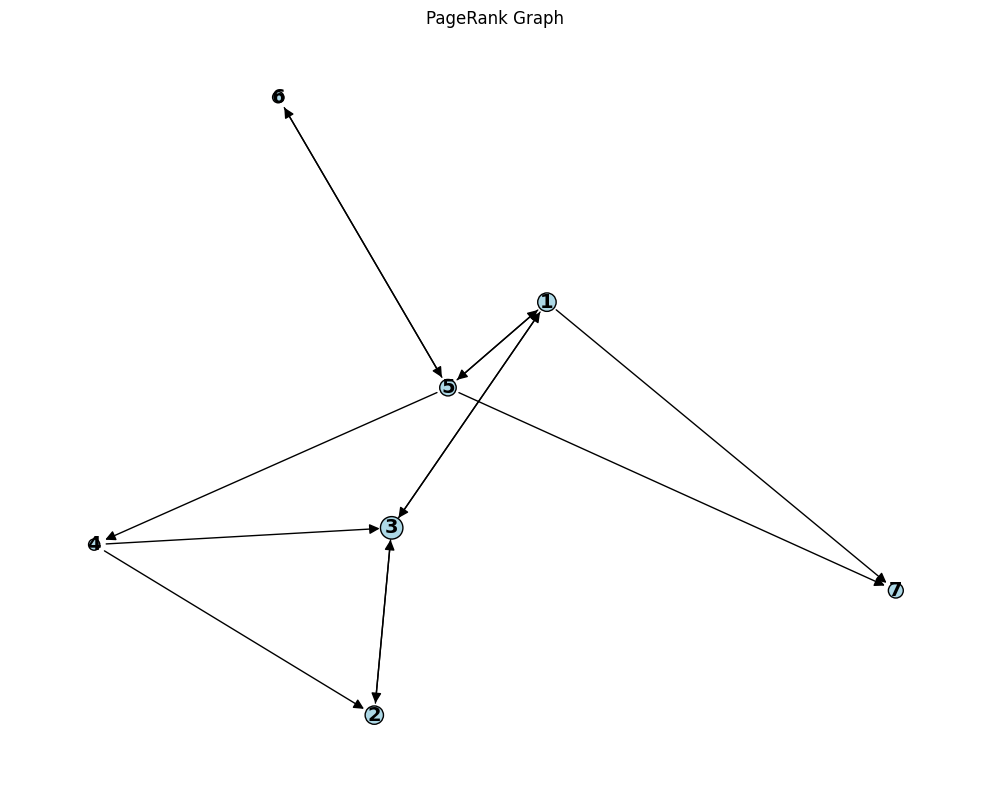


PageRank Nodes (Sorted):
Rank 1: Node 3 (PageRank: 0.261550)
Rank 2: Node 1 (PageRank: 0.176592)
Rank 3: Node 2 (PageRank: 0.174417)
Rank 4: Node 5 (PageRank: 0.141104)
Rank 5: Node 7 (PageRank: 0.115469)
Rank 6: Node 4 (PageRank: 0.065434)
Rank 7: Node 6 (PageRank: 0.065434)


In [10]:
# 2
# Implement the PageRank algorithm in Python for a given web graph, where the web graph is represented as a dictionary where each key is a web page and the
# corresponding value is a list of pages it links to? Your implementation should consider the damping factor, perform iterative calculations, and output the PageRank
# scores for each page in the graph. We all knew that after enough iterations, PageRank will always converge to a specific value. Visualize the iteration results and present
# the convergence computation performance.


import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for i in range(1, 8):
    G.add_node(i)

# Add edges
edges = [
    (1, 5), (5, 1),
    (1, 7),
    (1, 3),
    (5, 6), (6, 5),
    (5, 4),
    (4, 2),
    (4, 3),
    (2, 3),
    (3, 1),
    (3, 2),
    (5, 7)
]
G.add_edges_from(edges)

# Compute PageRank
pagerank = nx.pagerank(G, alpha=0.85, max_iter=100)

# Print PageRank values
print("PageRank values:")
for node in sorted(pagerank.keys()):
    print(f"Node {node}: {pagerank[node]:.6f}")

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Node sizes based on PageRank score
node_sizes = [pagerank[node] * 1000 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', edgecolors='black')
nx.draw_networkx_edges(G, pos, arrows=True, arrowsize=15)
nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

plt.title("PageRank Graph")
plt.axis('off')
plt.tight_layout()
plt.savefig("pagerank.png")
plt.show()

# Print ranked nodes
ranked_nodes = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("\nPageRank Nodes (Sorted):")
for rank, (node, score) in enumerate(ranked_nodes, 1):
    print(f"Rank {rank}: Node {node} (PageRank: {score:.6f})")


Converged after 40 iterations.

Final Authority Scores:
A: 0.276393
B: 0.447214
C: 0.723607
D: 0.447214
E: 0.000000

Final Hub Scores:
A: 0.544831
B: 0.544831
C: 0.128617
D: 0.465341
E: 0.416214


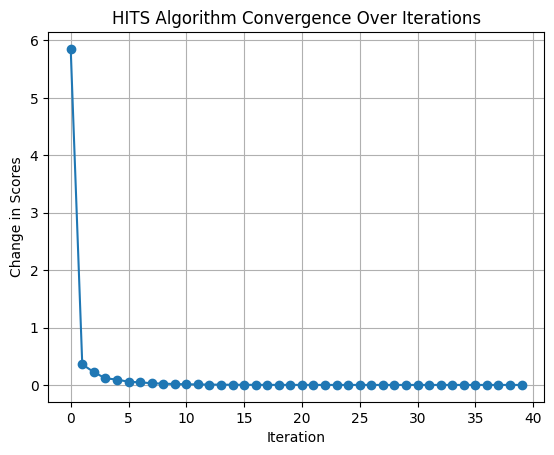

In [5]:
# 3. Implement the Hyperlink Induced Topic Search (HITS) algorithm 
# Authority: A node is high-quality if many high-quality nodes link to it 
# Hub: A node is high-quality if it links to many high-quality nodes 
# Algorithm Steps: 
# • Initialize the hub and authority of each node with a value of 1 
# • For each iteration, update the hub and authority of every node in the graph 
# • The new authority is the sum of the hub of its parents 
# • The new hub is the sum of the authority of its children 
# • Normalize the new authority and hub 
# How does the structure of a directed graph (e.g., the number of nodes and edges) influence the convergence rate and final authority and hub scores produced by the 
# HITS algorithm? Design an experiment to analyze this relationship by varying the graph’s topology (e.g., sparse vs. dense graphs) and documenting the resulting 
# scores and iterations needed for convergence.


import numpy as np
import matplotlib.pyplot as plt

graph = {
    'A': ['B', 'C'],
    'B': ['C', 'D'],
    'C': ['A'],
    'D': ['A', 'C'],
    'E': ['B', 'D']
}
#  Initialize hub and authority scores to 1
nodes = list(graph.keys())
num_nodes = len(nodes)
authority_scores = {node: 1.0 for node in nodes}
hub_scores = {node: 1.0 for node in nodes}
# Function to compute HITS scores
def compute_hits(graph, authority_scores, hub_scores, max_iterations=100, tolerance=1e-6):
    convergence_values = []  
    for iteration in range(max_iterations):
        new_authority_scores = {node: 0.0 for node in nodes}
        new_hub_scores = {node: 0.0 for node in nodes}
        #  Update Authority Scores
        for node in nodes:
            for parent in graph:
                if node in graph[parent]:  
                    new_authority_scores[node] += hub_scores[parent]
        #  Update Hub Scores
        for node in nodes:
            for child in graph[node]: 
                new_hub_scores[node] += authority_scores[child]
        #  Normalize Authority Scores
        norm = np.sqrt(sum(val ** 2 for val in new_authority_scores.values()))
        for node in nodes:
            if norm != 0:
                new_authority_scores[node] /= norm
        # Normalize Hub Scores
        norm = np.sqrt(sum(val ** 2 for val in new_hub_scores.values()))
        for node in nodes:
            if norm != 0:
                new_hub_scores[node] /= norm
        # Compute difference for convergence check
        diff = sum(abs(new_authority_scores[node] - authority_scores[node]) +
                   abs(new_hub_scores[node] - hub_scores[node]) for node in nodes)
        convergence_values.append(diff)
        #  Check for Convergence
        if diff < tolerance:
            print(f"Converged after {iteration + 1} iterations.")
            return new_authority_scores, new_hub_scores, convergence_values
        # Update for next iteration
        authority_scores = new_authority_scores
        hub_scores = new_hub_scores
    return authority_scores, hub_scores, convergence_values
# Run the HITS algorithm
final_authority, final_hub, convergence_values = compute_hits(graph, authority_scores, hub_scores)
# Print final Authority and Hub Scores
print("\nFinal Authority Scores:")
for node, score in final_authority.items():
    print(f"{node}: {score:.6f}")
print("\nFinal Hub Scores:")
for node, score in final_hub.items():
    print(f"{node}: {score:.6f}")

# Plot Convergence Performance
plt.plot(convergence_values, marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Change in Scores")
plt.title("HITS Algorithm Convergence Over Iterations")
plt.grid()
plt.show()
